In [1]:
from ThinFilmClasses import ThinFilmLayer, ThinFilmSystem
from DataProcessing import process_data, data_smoothing, plot_reflectance
from Optimization import residuals, optimize_nk
import numpy as np

In [27]:
# 1. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
# path = r'C:\Users\hongr\Box\MURI-SARA\Code\Sample_Refl_Scan\1.csv'
path = r'test_data\spectra\+02_+05.csv'
left = 380
right = 790
data = process_data(path, left, right)

# 2. Create multilayer system
n_points = 16 # Number of points used to fit the n_spline and k_spline
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("igzo_111", 108, n_points, left, right)
layer2 = ThinFilmLayer("sio2", 21.5, n_points, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

multilayer = ThinFilmSystem([air, layer1, layer2, substrate])
R, _, _ = multilayer.calculate_RTA(data['wavelength'])

# 3. Optimization (The most time-consuming step!)
optimal_data, _ = optimize_nk(multilayer, layer_index=1, data=data, n_points=n_points, smooth=False)

nk data found for air.
nk data found for igzo_111.
nk data found for sio2.
nk data found for c-Si.
Initial n of layer1 is: [2.18891476 2.15924208 2.14003859 2.12059613 2.10889382 2.09482273
 2.08189884 2.07303521 2.06247247 2.05481163 2.04493002 2.03790571
 2.03181067 2.02413183 2.01868929 2.01242414]
Initial k of layer1 is: [0.01513064 0.00576023 0.00290011 0.00230891 0.00027178 0.
 0.         0.         0.         0.         0.         0.00072186
 0.00071576 0.00111299 0.00105252 0.00042076]
Optimal n:  [2.21724822 2.18814871 2.20701829 2.0925004  2.05230065 2.05345887
 1.96828484 1.91056754 1.98770244 2.08144313 1.95356436 1.87822853
 1.99247773 1.95826379 1.97127666 1.97263319]
Optimal k:  [1.69658812e-02 1.25222825e-02 4.14560511e-02 5.89252930e-05
 8.84305268e-03 2.72793519e-02 2.57489385e-02 4.43411256e-02
 3.87995445e-02 2.58768206e-03 6.36025906e-02 2.10020845e-01
 5.05381435e-06 7.78181500e-02 3.23856607e-01 2.01618956e-02]
Optimal Thickness:  105.51860683527319


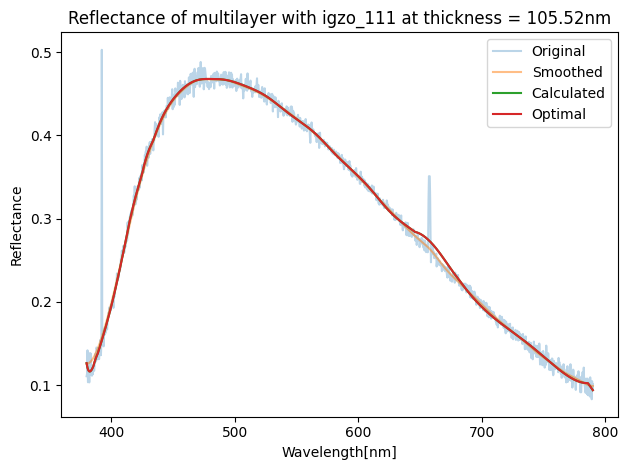

In [28]:
# 4. Plot the reflectance
plot_reflectance(data, smooth=True, multilayer=multilayer, layer_index=1, optimal_data=optimal_data)